# Importing libraries

In [22]:
import pandas as pd
import numpy as nm
import matplotlib as mp
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact
import seaborn as sns


# Reading Excel File


In [23]:
assign1 = pd.read_excel("InformationisBeautiful_DataBreaches.xlsx")

# Removing the unused columns

In [24]:
#Commands to remove all columns that are not mentioned in the document shared
del assign1['Unnamed: 7']
del assign1['Unnamed: 10']
del assign1['Unnamed: 11']
del assign1['Unnamed: 12']
del assign1['Unnamed: 13']
del assign1['alternative name']
del assign1['story']
del assign1['1st source link']
del assign1['2nd source link']
del assign1['3rd source']
del assign1['source name']


In [25]:
#excel sheet after removing all the unneccessary columns


In [26]:
#make a copy of the excel file 
assign2 = assign1

In [27]:
#format the column title
assign2 = assign2.rename(columns={'YEAR':'Year','records lost':'Records Lost','ORGANISATION':'Organization','METHOD OF LEAK':'Method of Leak','DATA SENSITIVITY':'Data Sensitivity'})

In [28]:
#decode Year column as given in the instructions
assign2.loc[assign2.Year==0,'Year']=2004
assign2.loc[assign2.Year==1,'Year']=2005
assign2.loc[assign2.Year==2,'Year']=2006
assign2.loc[assign2.Year==3,'Year']=2007
assign2.loc[assign2.Year==4,'Year']=2008
assign2.loc[assign2.Year==5,'Year']=2009
assign2.loc[assign2.Year==6,'Year']=2010
assign2.loc[assign2.Year==7,'Year']=2011
assign2.loc[assign2.Year==8,'Year']=2012
assign2.loc[assign2.Year==9,'Year']=2013
assign2.loc[assign2.Year==10,'Year']=2014
assign2.loc[assign2.Year==11,'Year']=2015
assign2.loc[assign2.Year==12,'Year']=2016
assign2.loc[assign2.Year==13,'Year']=2017
assign2.loc[assign2.Year==14,'Year']=2017

In [29]:
#Remove 0th row
assign2 = assign2.iloc[1:]

In [30]:
assign2['Data Sensitivity'] = pd.to_numeric(assign2['Data Sensitivity'])

In [31]:
#decode data sensitivity column as per the instruction in excel sheet.
assign2.loc[(assign2['Data Sensitivity']==1),'Data Sensitivity']='Just Email Addresses/Online Information'
assign2.loc[(assign2['Data Sensitivity']==20),'Data Sensitivity']='SSN/Personal Details'
assign2.loc[(assign2['Data Sensitivity']==300),'Data Sensitivity']='Credit card Information'
assign2.loc[(assign2['Data Sensitivity']==4000),'Data Sensitivity']='Email Passwords/Health Records'
assign2.loc[(assign2['Data Sensitivity']==50000),'Data Sensitivity']='Full Bank Account Details'

In [32]:
#Find out if there are any missing values
assign2.isnull().values.any()

True

In [33]:
#Find out the column that has null value
assign2.isnull().sum()

Entity                  0
Year                    0
Records Lost            2
Organization            0
Method of Leak          0
NO OF RECORDS STOLEN    0
Data Sensitivity        0
dtype: int64

In [34]:
#Identify the rows that have null value for the column 'Records Lost'
assign2[assign2.isnull().any(axis=1)]

Entity  Year Records Lost Organization Method of Leak  \
164      OVH  2013          NaN          web         hacked   
165  UbiSoft  2013          NaN       gaming         hacked   

    NO OF RECORDS STOLEN      Data Sensitivity  
164               500000  SSN/Personal Details  
165             58000000  SSN/Personal Details

In [35]:
assign_try = assign2


In [36]:
assign_try['Records Lost'].fillna(assign_try['NO OF RECORDS STOLEN'],inplace = True)


In [37]:
del assign_try['NO OF RECORDS STOLEN']


In [38]:
#Find out the column that has null value
assign_try.isnull().sum()

Entity              0
Year                0
Records Lost        0
Organization        0
Method of Leak      0
Data Sensitivity    0
dtype: int64

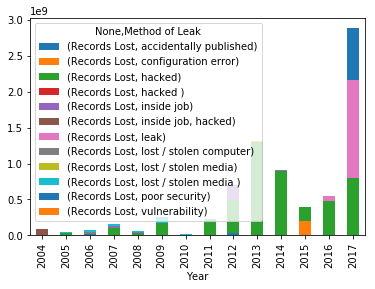

In [39]:
 #Analyse the data
assign_try['Records Lost'] = pd.to_numeric(assign_try['Records Lost'])
assign_try.describe()
assign_try['Records Lost'].describe()

plotdata = assign_try[['Year','Records Lost','Entity','Method of Leak']]
plotdata_group = plotdata.groupby(['Year','Method of Leak']).sum()

plotdata_group.unstack().head
plotdata_total = plotdata_group.sum()
myplot = plotdata_group.unstack().plot(kind ='bar',stacked = 'True')

# Write to excel file 

In [40]:
assign_try.to_excel("Assignment2_databreach_v1.xlsx")

In [41]:
assign_try.to_csv("Assignment_2v4.csv", index=False)